# Final Project
## Data Analysis in Human Resources
Ana André, Data squad #21 | Lisboa, 2019.10.11

## Table of Contents
- [Context](#context)
- [Motivation](#motivation)
- [Dataset](#dataset)
- [Explore the dataset](#explore-dataset)
- [Modeling, prediction and evaluation - Original Data Set](#modeling-original-dataset)
- [Modeling, prediction and evaluation - Resampling the data](#modeling-resampled-dataset)
- [Recursive feature elimination](#RFE)
- [Cross validation](#CV)

<a name="context"></a>

## Context

For this project I put myself on the shoes of a data analyst working for a building facilities management company and I did a supervised machine learning for room occupancy detection to improve the algorithm of the HVAC control systems.

<a name="motivation"></a>

## Motivation

Energy efficiency in buildings has been a hot topic for quite a while now both for sustainability and cost reasons.
Literature states that the accurate determination of room occupancy detection can lead to energy savings up to 30 to 40 % which can mean a lot in terms of money and CO2 emitions.
So designing smart buildings, buildings able to adjust to user's needs in real time, is the path we want to follow.

<a name="dataset"></a>

## Dataset

I got my dataset from the University of California's repository for machine learning.
It results from an experiment that monotorized 4 environmental measures over time:
- temperature
- humidity
- light
- CO2 concentration.
20560 instances for each feature.
There is also a label feature to specify the room occupation (1 for occupied, 0 for non-occupied)

[Dataset](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#)

<a name="eda"></a>

## Data Cleaning

### Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

### Load the data

In [3]:
# load the data
data = pd.read_csv('../data/HRDataset_v13.csv') # kaggle dataset
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [4]:
data.shape

(401, 35)

In [5]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

Columns description provided by the creator of the dataset:

- Employee Name - Employee’s full name

- EmpID - Employee ID is unique to each employee

- MarriedID - Is the person married (1 or 0 for yes or no)

- MaritalStatusID - Marital status code that matches the text field MaritalDesc

- EmpStatusID - Employment status code that matches text field EmploymentStatus

- DeptID - Department ID code that matches the department the employee works

- PerfScoreID - Performance Score code that matches the employee’s most recent 
performance score

- FromDiversityJobFairID - Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no

- PayRate - The person’s hourly pay rate. All salaries are converted to hourly pay rate

- Termd - Has this employee been terminated - 1 or 0

- PositionID - An integer indicating the person’s position

- Position - The text name/title of the position the person has

- State - The state that the person lives in

- Zip - The zip code for the employee

- DOB - Date of Birth for the employee

- Sex - M or F

- MaritalDesc - The marital status of the person (divorced, single, widowed, separated, etc)

- CitizenDesc - Label for whether the person is a Citizen or Eligible NonCitizen

- HispanicLatino - Yes or No field for whether the employee is Hispanic/Latino

- RaceDesc - Description/text of the race the person identifies with

- DateofHire - Date the person was hired

- DateofTermination - Date the person was terminated, only populated if, in fact, Termd = 1

- TermReason - A text reason / description for why the person was terminated

- EmploymentStatus - A description/category of the person’s employment status. 
Anyone currently working full time = Active

- Department - Name of the department that the person works in

- ManagerName - The name of the person’s immediate manager

- ManagerID - A unique identifier for each manager.

- RecruitmentSource - The name of the recruitment source where the employee was recruited from

- PerformanceScore - Performance Score text/category (Fully Meets, Partially Meets, PIP, Exceeds)

- EngagementSurvey - Results from the last engagement survey, managed by our external partner

- EmpSatisfaction - A basic satisfaction score between 1 and 5, as reported on a recent employee satisfaction survey

- SpecialProjectsCount - The number of special projects that the employee worked on during the last 6 months

- LastPerformanceReviewDate - The most recent date of the person’s last performance review.

- DaysLateLast30 - The number of times that the employee was late to work during the last 30 days

In [6]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,302.000000,310.000000,310.000000,310.000000,207.0
mean,1.199745e+09,0.396774,0.809677,0.429032,2.396774,4.606452,2.983871,0.093548,31.284806,0.332258,16.838710,6569.732258,14.579470,3.332097,3.890323,1.209677,0.0
std,1.829600e+08,0.490019,0.944702,0.495738,1.795533,1.082349,0.577124,0.291670,15.383615,0.471785,6.232272,16933.864054,8.090352,1.290590,0.910690,2.352009,0.0
min,6.020003e+08,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1013.000000,1.000000,1.030000,1.000000,0.000000,0.0
25%,1.101024e+09,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,20.000000,0.000000,18.000000,1901.250000,10.000000,2.082500,3.000000,0.000000,0.0
50%,1.203032e+09,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,24.000000,0.000000,19.000000,2132.000000,15.000000,3.470000,4.000000,0.000000,0.0
75%,1.378814e+09,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,45.315000,1.000000,20.000000,2357.000000,19.000000,4.520000,5.000000,0.000000,0.0
max,1.988300e+09,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,80.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,0.0


### Handling 'DaysLateLast30' column

In [7]:
# check unique values in 'DaysLateLast30' column
data.DaysLateLast30.unique()

array([ 0., nan])

'DaysLateLast30' has either 0 or NaN values so it's usefull and I dropped it.

In [8]:
# drop column 'DaysLateLast30'
data.drop('DaysLateLast30', axis = 1, inplace = True)

### Handling Missing Values

In [9]:
# check for missing values
data.isnull().sum()

Employee_Name                  91
EmpID                          91
MarriedID                      91
MaritalStatusID                91
GenderID                       91
EmpStatusID                    91
DeptID                         91
PerfScoreID                    91
FromDiversityJobFairID         91
PayRate                        91
Termd                          91
PositionID                     91
Position                       91
State                          91
Zip                            91
DOB                            91
Sex                            91
MaritalDesc                    91
CitizenDesc                    91
HispanicLatino                 91
RaceDesc                       91
DateofHire                     91
DateofTermination             298
TermReason                     92
EmploymentStatus               91
Department                     91
ManagerName                    91
ManagerID                      99
RecruitmentSource              91
PerformanceSco

It seems that there are 91 empty rows in the dataset, so I dropped these rows.

In [10]:
# drop empty rows
data.dropna(axis = 0, how = 'all', inplace = True)
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019


In [11]:
data.shape

(310, 34)

In [12]:
# check for duplicates
data.duplicated().sum()

0

There are no duplicated values.

In [13]:
# check for missing values again
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
PayRate                         0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      1
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

'DateofTermination' and 'LastPerformanceReview_Date' have missing values.

According to the column description, 'DateofTermination' is only populated if the employee is not active. Nevertheless, I did a check.

In [14]:
# check if NaN values in 'DateofTermination' match active employees
len(data[(data.Termd) == 1 & data['DateofTermination'].isnull()])

0

As the result is 0, it's confirmed that it matches.

In [15]:
# check values in 'Termd': 0 stands for active employees, 1 is for employees that have been terminated
data.Termd.value_counts()

0.0    207
1.0    103
Name: Termd, dtype: int64

In the above step, I also realized that the missing values in 'LastPerformanceReview_Date' match the number of employees that have been terminated. So this columns is also solved.

There's also a missing value in 'TermReason' but I didn't drop the row because it's only a value and the row has meaningful information for the other fields.

I decided to fill all the NaN values with 0.

In [16]:
# filling NaN values with 0
data_fillna = data.fillna(0)

In [17]:
# check missing values again
data_fillna.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
PayRate                       0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [18]:
# check data types
data_fillna.dtypes

Employee_Name                  object
EmpID                         float64
MarriedID                     float64
MaritalStatusID               float64
GenderID                      float64
EmpStatusID                   float64
DeptID                        float64
PerfScoreID                   float64
FromDiversityJobFairID        float64
PayRate                       float64
Termd                         float64
PositionID                    float64
Position                       object
State                          object
Zip                           float64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

There are a few data types that should be converted, namely:
- *ID columns -> int
- Termd -> int
- ZIP -> int
- DOB,DateofHire, DateofTermination, LastPerformanceReview_Date -> date
- EmpSatisfaction -> int
- SpecialProjectsCount -> int

### Convert data types

#### Convert to int64

In [19]:
# creating of columns that end with 'ID'
col_int_ID = [i for i in list(data_fillna.columns) if i.endswith('ID')]
col_int_ID

['EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'PositionID',
 'ManagerID']

In [20]:
# add the other columns
col_int_add = ['Termd','Zip','EmpSatisfaction','SpecialProjectsCount']

col_int = col_int_ID + col_int_add
col_int

['EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'PositionID',
 'ManagerID',
 'Termd',
 'Zip',
 'EmpSatisfaction',
 'SpecialProjectsCount']

In [21]:
# convert to int
for i in col_int:
    data_fillna[i] = data_fillna[i].astype('int64')

data_fillna.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
PayRate                       float64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

#### Convert to date

In [22]:
# convert to datetime

col_to_date = ['DOB','DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']

for i in col_to_date:
    data_fillna[i] = pd.to_datetime(data_fillna[i])

data_fillna.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
PayRate                              float64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

In [23]:
# checking for wrong converted dates in DOB
data_fillna.DOB[data_fillna.DOB.dt.year > 2019]

6     2064-06-01
7     2063-05-15
12    2054-10-12
22    2063-08-28
31    2068-01-15
32    2065-05-07
54    2066-03-17
57    2064-01-04
61    2068-07-06
73    2054-09-21
74    2068-10-10
87    2055-11-14
91    2067-04-19
101   2065-05-09
102   2065-09-09
112   2067-06-03
115   2068-07-20
116   2067-06-05
146   2068-08-15
155   2064-04-13
157   2068-05-30
159   2061-06-19
160   2068-06-06
164   2058-12-27
175   2065-02-02
184   2066-03-22
195   2051-01-02
200   2059-08-19
213   2055-04-14
215   2052-08-18
231   2064-10-12
235   2058-11-07
242   2067-01-16
247   2063-10-30
248   2053-05-24
249   2066-04-17
250   2051-02-25
279   2052-02-11
298   2066-11-22
303   2064-07-30
305   2052-01-18
308   2065-09-09
Name: DOB, dtype: datetime64[ns]

In [24]:
# fixing DOB dates
data_fillna.DOB = data_fillna.DOB.apply(lambda x: x - pd.DateOffset(years = 100) if x.year > 2019 else x)
data_fillna.DOB.head()

0   1987-11-24
1   1984-04-26
2   1986-09-01
3   1985-09-16
4   1988-05-19
Name: DOB, dtype: datetime64[ns]

In [25]:
# checking for wrong convert dates in 'DateofTermination'
data_fillna.DateofTermination.value_counts()[:5]

1970-01-01    207
2012-09-24      2
2014-04-04      2
2015-09-07      2
2016-05-01      2
Name: DateofTermination, dtype: int64

The missing values filled with 0 were now converted to '1970-01-01' and need to be fixed.

In [26]:
# fixing 'DateofTermination' dates
#data_fillna.DateofTermination = data_fillna.DateofTermination.apply(lambda x: 0 if x.year == 1970 else x)
#data_fillna.DateofTermination.head()

In [27]:
# checking for wrong convert dates in 'LastPerformanceReview_Date'
data_fillna.LastPerformanceReview_Date.value_counts()[:5]

1970-01-01    103
2019-01-14     18
2019-02-18     12
2019-01-21     10
2019-01-28      9
Name: LastPerformanceReview_Date, dtype: int64

In [28]:
# fixing 'LastPerformanceReview_Date'
#data_fillna.LastPerformanceReview_Date = data_fillna.LastPerformanceReview_Date.apply(lambda x: 0 if x.year == 1970 else x)
#data_fillna.LastPerformanceReview_Date.head()

In [29]:
data_fillna.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
PayRate                              float64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

### Handling 'HispanicLatino' column

In [30]:
data_fillna.HispanicLatino.unique()

array(['No', 'Yes', 'yes', 'no'], dtype=object)

This column contains only 'yes' or 'no' values so I replaced the values with 1 and 0.

In [31]:
### Replace HispanicLatin with binary values: 1 for yes and 0 for no
data_binary_hispanic = data_fillna.copy()
data_binary_hispanic['HispanicLatino'] = data_binary_hispanic.HispanicLatino.replace({'No':0,
                                                                      'Yes':1,
                                                                      'yes':1,
                                                                      'no':0})
data_binary_hispanic.HispanicLatino.unique()

array([0, 1], dtype=int64)

In [32]:
data_binary_hispanic.HispanicLatino.dtypes

dtype('int64')

(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f42d3e1400>)

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Hispanic/Latino')

Text(0.5, 1.0, 'Hispanic/Latino Employees')

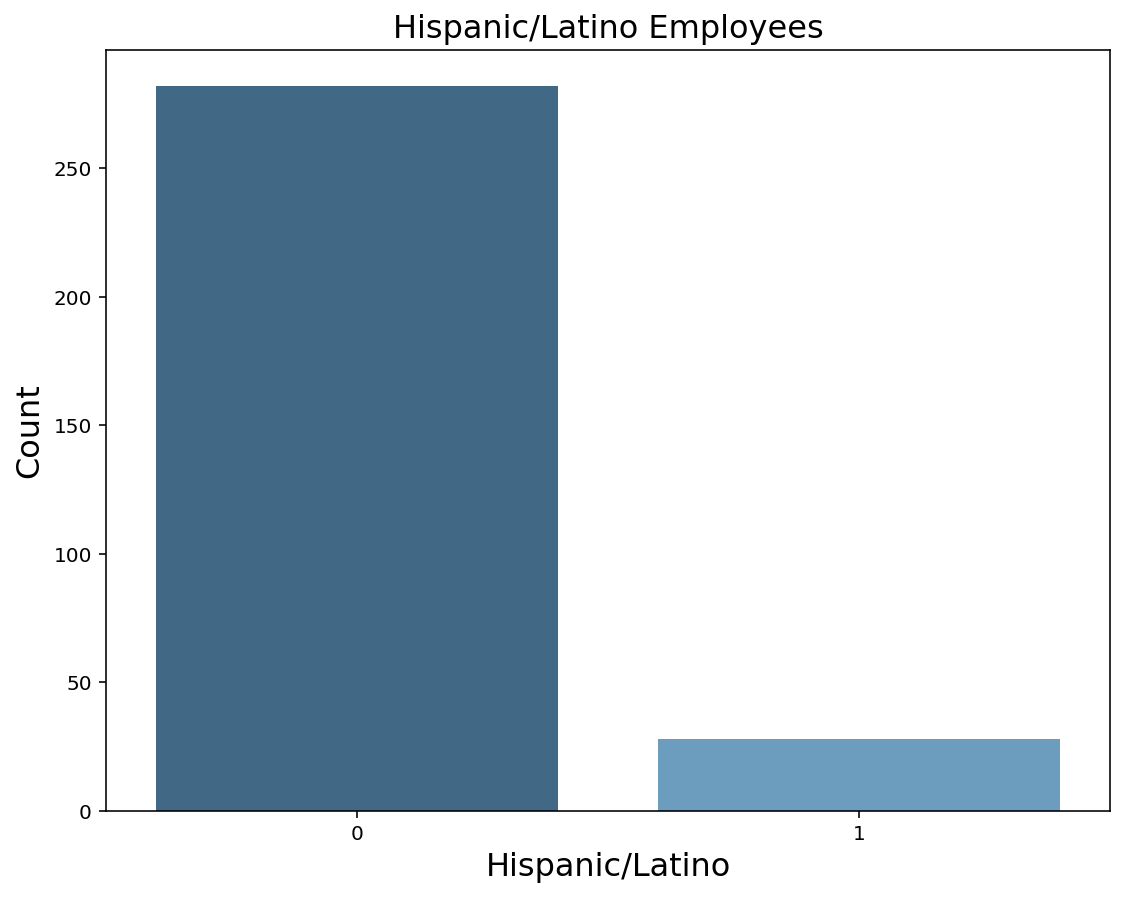

In [33]:
# checking hispanic/latino distribution
plt.subplots(figsize=(9,7))
sns.barplot(x=data_binary_hispanic.HispanicLatino.value_counts().index,
            y=data_binary_hispanic.HispanicLatino.value_counts().values, palette='Blues_d')
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Hispanic/Latino', fontsize = 16)
plt.title('Hispanic/Latino Employees', fontsize = 16)
plt.show()

### Handling 'CitizenDesc' column

In [34]:
data_binary_hispanic.CitizenDesc.unique()

array(['US Citizen', 'Eligible NonCitizen', 'Non-Citizen'], dtype=object)

Since this column as 3 possible labels, I added a new column with codes that match the CitizenDesc text field.

In [35]:
# create new column. code: US Citizen = 1, Elegible NonCitizen = 2, Non-Citizen = 0

citizen_labels = {'US Citizen':1, 'Eligible NonCitizen':2, 'Non-Citizen':0}

data_binary_hispanic['CitizenID'] = data_binary_hispanic['CitizenDesc'].map(citizen_labels)

In [36]:
data_binary_hispanic.CitizenID.unique()

array([1, 2, 0], dtype=int64)

(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f42d6a1f60>)

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Citizenship')

Text(0.5, 1.0, 'Employees by Citizenship')

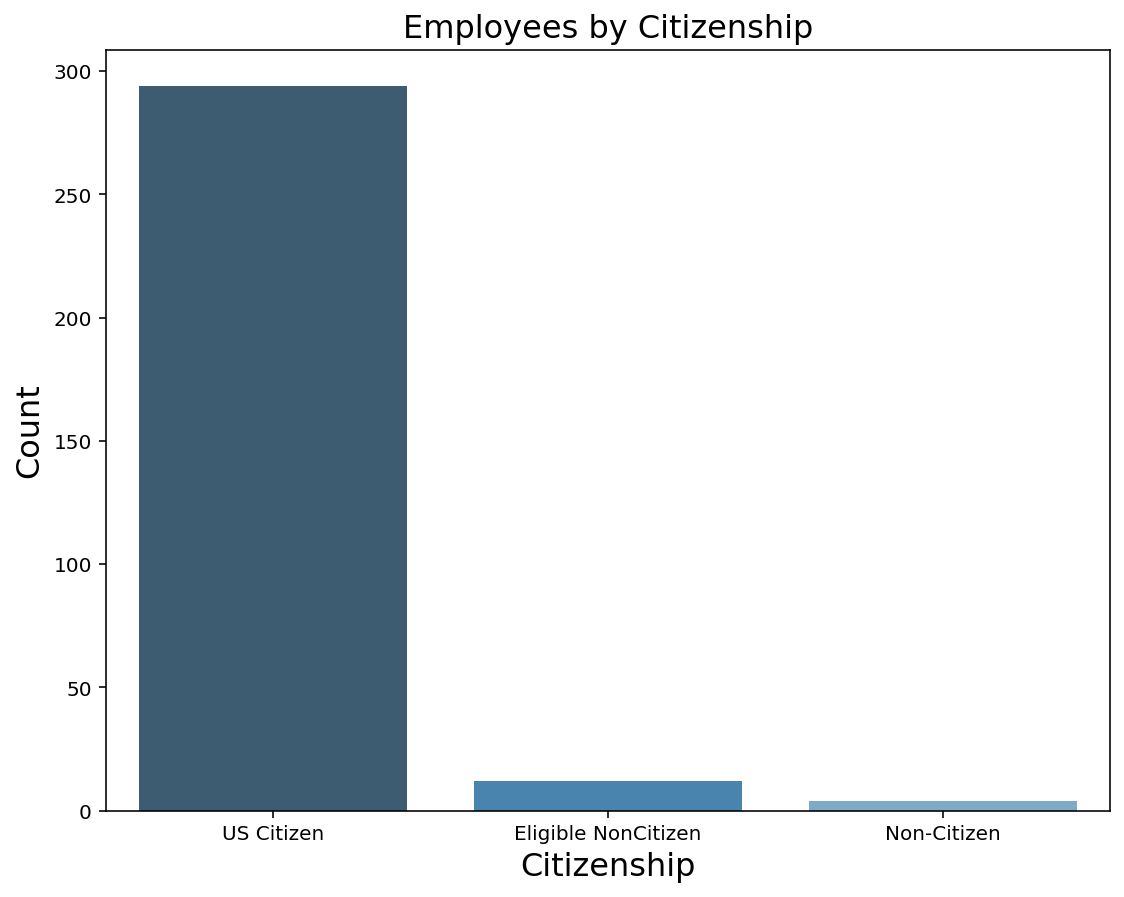

In [37]:
# checking citizen distribution
plt.subplots(figsize=(9,7))
sns.barplot(x=data_binary_hispanic.CitizenDesc.value_counts().index,
            y=data_binary_hispanic.CitizenDesc.value_counts().values, palette='Blues_d')
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Citizenship', fontsize = 16)
plt.title('Employees by Citizenship', fontsize = 16)
plt.show()

### Unique values by categorical column

In [38]:
# checking unique values for each categorical column, except for the Employee Name
for col in data_binary_hispanic.iloc[:,1:]:
    if data_binary_hispanic[col].dtypes == 'object':
        print(col,' : ',data_binary_hispanic[col].str.rstrip().unique())

Position  :  ['Accountant I' 'Administrative Assistant' 'Area Sales Manager'
 'BI Developer' 'BI Director' 'CIO' 'Data Architect'
 'Database Administrator' 'Data Analyst' 'Director of Operations'
 'Director of Sales' 'IT Director' 'IT Manager - DB' 'IT Manager - Infra'
 'IT Manager - Support' 'IT Support' 'Network Engineer' 'President & CEO'
 'Production Manager' 'Production Technician I' 'Production Technician II'
 'Sales Manager' 'Senior BI Developer' 'Shared Services Manager'
 'Software Engineer' 'Software Engineering Manager' 'Sr. Accountant'
 'Sr. DBA' 'Enterprise Architect' 'Principal Data Architect'
 'Sr. Network Engineer']
State  :  ['MA' 'VA' 'VT' 'WA' 'NH' 'NY' 'OH' 'ID' 'TN' 'UT' 'AL' 'NC' 'MT' 'AZ'
 'ME' 'CA' 'CT' 'IN' 'NV' 'CO' 'TX' 'GA' 'FL' 'KY' 'ND' 'OR' 'RI' 'PA']
Sex  :  ['F' 'M']
MaritalDesc  :  ['Married' 'Divorced' 'Single' 'Widowed' 'Separated']
CitizenDesc  :  ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
RaceDesc  :  ['Black or African American' 'White' 'As

### Add new columns

In [39]:
# add column age

now = pd.Timestamp('now') # calculate the age related to present
data_binary_hispanic['Age'] = ((now - data_binary_hispanic.DOB)/365).dt.days
data_binary_hispanic.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,CitizenID,Age
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,Brandon R. LeBlanc,1,Diversity Job Fair,Fully Meets,2.04,2,6,2019-01-15,1,31
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,0,23.00,...,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,4,4,2019-01-17,1,35
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,Brandon R. LeBlanc,1,Internet Search,Fully Meets,3.90,5,5,2019-01-18,1,33
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,Brandon R. LeBlanc,1,Pay Per Click - Google,Fully Meets,3.24,3,4,1970-01-01,1,34
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,3,5,2019-01-15,1,31


(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f42d775c88>)

(array([47., 67., 51., 48., 35., 27., 19.,  3.,  4.,  9.]),
 array([27. , 31.1, 35.2, 39.3, 43.4, 47.5, 51.6, 55.7, 59.8, 63.9, 68. ]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Age')

Text(0.5, 1.0, 'Employees by Age')

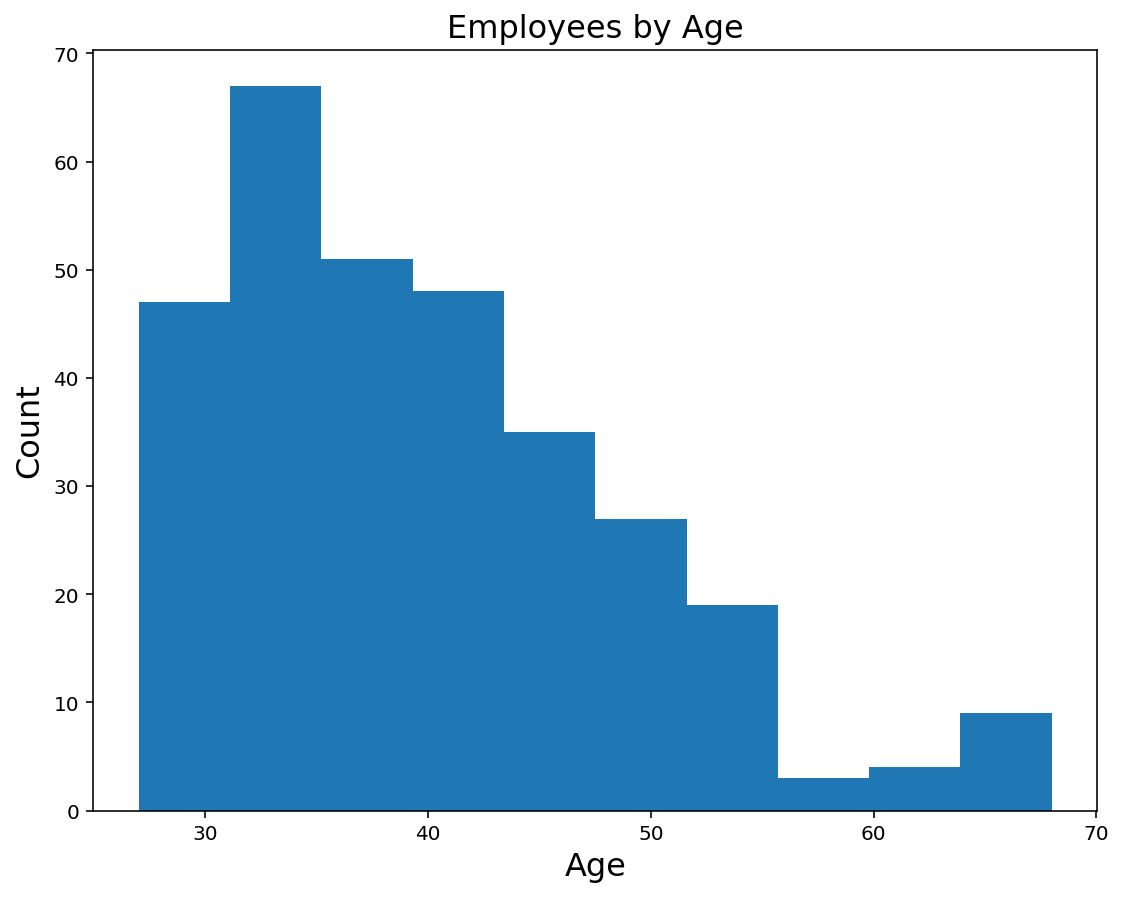

In [40]:
# check the employees age distribution
plt.subplots(figsize=(9,7))
plt.hist(data_binary_hispanic.Age)
#sns.barplot(x=data_binary_hispanic.CitizenDesc.value_counts().index,
#            y=data_binary_hispanic.CitizenDesc.value_counts().values, palette='Blues_d')
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.title('Employees by Age', fontsize = 16)
plt.show()

In [41]:
# years as an employee of the company
data_binary_hispanic['TimeEmployee'] = np.where(data_binary_hispanic.EmploymentStatus == 'Active',
                                                ((now - data_binary_hispanic.DateofHire)/365).dt.days,
                                                ((data_binary_hispanic.DateofTermination - data_binary_hispanic.DateofHire)/365).dt.days)
data_binary_hispanic.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,CitizenID,Age,TimeEmployee
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,1,Diversity Job Fair,Fully Meets,2.04,2,6,2019-01-15,1,31,10
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,0,23.00,...,1,Website Banner Ads,Fully Meets,5.00,4,4,2019-01-17,1,35,5
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,1,Internet Search,Fully Meets,3.90,5,5,2019-01-18,1,33,5
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,1,Pay Per Click - Google,Fully Meets,3.24,3,4,1970-01-01,1,34,0
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,1,Website Banner Ads,Fully Meets,5.00,3,5,2019-01-15,1,31,4


In [42]:
# check main reasons for the employee to quit
data_binary_hispanic.TermReason.value_counts()

N/A - still employed                196
Another position                     20
unhappy                              14
more money                           11
N/A - Has not started yet            11
career change                         9
hours                                 9
attendance                            7
return to school                      5
relocation out of area                5
retiring                              4
military                              4
performance                           4
no-call, no-show                      3
medical issues                        3
maternity leave - did not return      3
0                                     1
gross misconduct                      1
Name: TermReason, dtype: int64

In [43]:
# check employees status values
data_binary_hispanic.EmploymentStatus.value_counts()

Active                    182
Voluntarily Terminated     88
Terminated for Cause       15
Leave of Absence           14
Future Start               11
Name: EmploymentStatus, dtype: int64

### Save file to csv

In [44]:
data_binary_hispanic.to_csv('Clean_ds_300.csv')